following this tutorial: https://medium.com/@santiagocasas/using-python-scientific-tools-for-a-rough-analysis-of-covid-19-data-d3ac58f474bf

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters 
##needed to properly use datetime in plots
register_matplotlib_converters()  
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sklm
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

# extract data

The John Hopkins observatory is providing a github repository with all recent data: https://github.com/CSSEGISandData/COVID-19.git



In [2]:
giturl_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
giturl_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
giturl_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

In [3]:
casestr='Confirmed'   #'Confirmed' #'Recovered', 'Deaths'
chosen_plotmodel = 'Logistic'  #'Logistc'

In [4]:
if casestr=='Confirmed':
    curl = giturl_confirmed
elif casestr=='Deaths':
    curl = giturl_deaths
elif casestr=='Recovered':
    curl = giturl_recovered

In [6]:
corona_cases_df=pd.read_csv(curl, index_col=[0,1,2,3])  #   use first four columns as multiindex

In [8]:
corona_cases_df

1/22/20  1/23/20  1/24/20  \
Province/State Country/Region Lat      Long                                   
NaN            Thailand        15.0000  101.0000        2        3        5   
               Japan           36.0000  138.0000        2        1        2   
               Singapore       1.2833   103.8333        0        1        3   
               Nepal           28.1667  84.2500         0        0        0   
               Malaysia        2.5000   112.5000        0        0        0   
...                                                   ...      ...      ...   
Aruba          Netherlands     12.5186 -70.0358         0        0        0   
NaN            Zambia         -15.4167  28.2833         0        0        0   
               Djibouti        11.8251  42.5903         0        0        0   
               Gambia, The     13.4432 -15.3101         0        0        0   
Montserrat     United Kingdom  16.7425 -62.1874         0        0        0   

                                                  1/25/20  1/26/20  1/27/20  \
Province/State Country/Region Lat      Long                                   
NaN            Thailand        15.0000  101.0000        7        8        8   
               Japan           36.0000  138.0000        2        4        4   
               Singapore       1.2833   103.8333        3        4        5   
               Nepal           28.1667  84.2500         1        1        1   
               Malaysia        2.5000   112.5000        3        4        4   
...                                                   ...      ...      ...   
Aruba          Netherlands     12.5186 -70.0358         0        0        0   
NaN            Zambia         -15.4167  28.2833         0        0        0   
               Djibouti        11.8251  42.5903         0        0        0   
               Gambia, The     13.4432 -15.3101         0        0        0   
Montserrat     United Kingdom  16.7425 -62.1874         0        0        0   

                                                  1/28/20  1/29/20  1/30/20  \
Province/State Country/Region Lat      Long                                   
NaN            Thailand        15.0000  101.0000       14       14       14   
               Japan           36.0000  138.0000        7        7       11   
               Singapore       1.2833   103.8333        7        7       10   
               Nepal           28.1667  84.2500         1        1        1   
               Malaysia        2.5000   112.5000        4        7        8   
...                                                   ...      ...      ...   
Aruba          Netherlands     12.5186 -70.0358         0        0        0   
NaN            Zambia         -15.4167  28.2833         0        0        0   
               Djibouti        11.8251  42.5903         0        0        0   
               Gambia, The     13.4432 -15.3101         0        0        0   
Montserrat     United Kingdom  16.7425 -62.1874         0        0        0   

                                                  1/31/20  ...  3/9/20  \
Province/State Country/Region Lat      Long                ...           
NaN            Thailand        15.0000  101.0000       19  ...      50   
               Japan           36.0000  138.0000       15  ...     511   
               Singapore       1.2833   103.8333       13  ...     150   
               Nepal           28.1667  84.2500         1  ...       1   
               Malaysia        2.5000   112.5000        8  ...     117   
...                                                   ...  ...     ...   
Aruba          Netherlands     12.5186 -70.0358         0  ...       0   
NaN            Zambia         -15.4167  28.2833         0  ...       0   
               Djibouti        11.8251  42.5903         0  ...       0   
               Gambia, The     13.4432 -15.3101         0  ...       0   
Montserrat     United Kingdom  16.7425 -62.1874         0  ...       0   

   

## convert dates to DatetimeIndex

In [7]:
corona_cases_df.columns.values

array(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20'], dtype=object)

In [9]:
datesformatted = [datetime.strptime(da, '%m/%d/%y') 
                  for da in corona_cases_df.columns.values]

daterange = pd.DatetimeIndex(datesformatted)

In [10]:
daterange

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

### select wanted countries

In [13]:
wanted_countries = ['China', 'Korea','Italy', 'France', 'US']

In [16]:
country_official_list = (corona_cases_df.index.get_level_values('Country/Region').values)
country_official_list

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Australia', 'Australia', 'Cambodia', 'Sri Lanka',
       'Germany', 'Finland', 'United Arab Emirates', 'Philippines',
       'India', 'Italy', 'Sweden', 'Spain', 'Australia', 'Belgium',
       'Egypt', 'Australia', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Algeria', 'Croatia', 'Switzerland',
       'Austria', 'Israel', 'Pakistan', 'Brazil', 'Georgia', 'Greece',
       'North Macedonia', 'Norway', 'Romania', 'Estonia', 'San Marino',
       'Belarus', 'Iceland', 'Lithuania', 'Mexico', 'New Zealand',
       'Nigeria', 'Australia', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar',
       'Ecuador', 'Azerbaijan', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal', 'Andorra', 'Australia', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Australia', 'Liechtenstein',
       'Poland', 'Tunisia', 'Bosn

In [14]:
countries_list = [np.unique(np.array([s for s in country_official_list if cou in s])) 
                                                 for cou in wanted_countries]
countries_list = np.array(countries_list).flatten()
countries_list.sort()

In [15]:
countries_list

array(['China', 'France', 'Italy', 'Korea, South', 'US'], dtype='<U12')

In [36]:
cases_per_country_per_day = {}

for country in countries_list: # for each country
    count_per_day = corona_cases_df.loc[pd.IndexSlice[:, country], :].sum() #sum over all regions for each day
    cases_per_country_per_day[country] = count_per_day[count_per_day > 0]
    formatted_dates = [datetime.strptime(day, '%m/%d/%y') for day in cases_per_country_per_day[country].index]
    
    #make a dataframe and add daycount (days since first reported case)
    cases_per_country_per_day[country] = pd.DataFrame(cases_per_country_per_day[country], 
                                    columns=['Cases'], index=formatted_dates)
    cases_per_country_per_day[country]['DayCount'] = np.arange(1, 
                                             cases_per_country_per_day[country].shape[0]+1)

In [38]:
print(df_dict['Italy']['Cases'][::3])  #print cases every three days

2020-01-31        2
2020-02-03        2
2020-02-06        2
2020-02-09        3
2020-02-12        3
2020-02-15        3
2020-02-18        3
2020-02-21       20
2020-02-24      229
2020-02-27      655
2020-03-01     1694
2020-03-04     3089
2020-03-07     5883
2020-03-10    10149
2020-03-13    17660
2020-03-16    27980
Name: Cases, dtype: int64


China
France
Italy
Korea, South
US


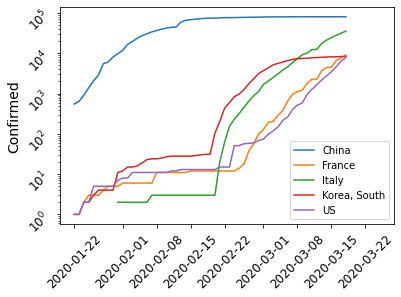

In [40]:
for country in countries_list:
    print(country)
    dates=cases_per_country_per_day[country].index
    plt.semilogy(dates, np.array(list(cases_per_country_per_day[country]['Cases'].values)), label=country)
    plt.legend(loc='lower right')
    plt.tick_params(rotation=45, labelsize=12)
    plt.ylabel(casestr, fontsize=14)
plt.xlim([dates[0]-np.timedelta64(3,'D'), dates[-1]+np.timedelta64(10,'D')])
plt.show()

China
France
Italy
Korea, South
US


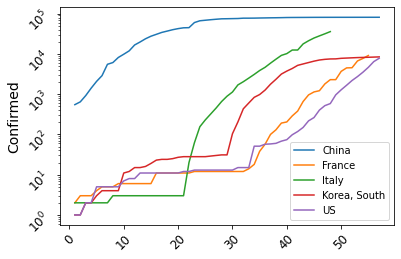

In [45]:
for country in countries_list:
    print(country)
    dates=cases_per_country_per_day[country].index
    plt.semilogy(cases_per_country_per_day[country]['DayCount'].values,
                 cases_per_country_per_day[country]['Cases'].values, label=country)
    plt.legend(loc='lower right')
    plt.tick_params(rotation=45, labelsize=12)
    plt.ylabel(casestr, fontsize=14)
plt.show()

# implementing models 

In [46]:
def exponential_model(x,p,N0=3,x0=1):
    return N0*(1+p)**(x-x0)

def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

def gompertz_model(x,a,b,c):
    return c*np.exp(-b*np.exp(-x/a))

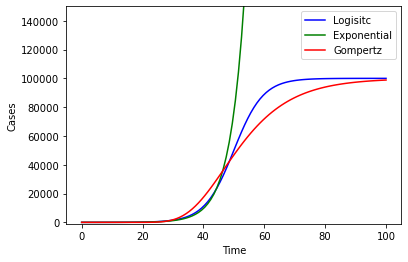

In [47]:
tt= np.linspace(0,100,100)
plt.plot(tt, logistic_model(tt,4.8,50,100000), c='b', label='Logisitc')
plt.plot(tt, exponential_model(tt, 0.23), c='g', label='Exponential')
plt.plot(tt, gompertz_model(tt, 12, 49, 100000), c='r', label='Gompertz')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cases')
plt.ylim(-1000,150000)
plt.show()

In [48]:
leaveout = -1 #leave out last day to try to predict

for country in countries_list:
    print('----')
    print('Country: ', country)
    if leaveout==0:
      leaveout=None

    x = cases_per_country_per_day[country]['DayCount'].values[0:leaveout]  ##remove last data point to make prediction
    y = cases_per_country_per_day[country]['Cases'].values[0:leaveout]    ##remove last data point to make prediction

    y0 = y[0]
    yf = y[-1]
    print("Initial number of cases: ", y0)
    print("Current number of cases: ", yf)

----
Country:  China
Initial number of cases:  548
Current number of cases:  81058
----
Country:  France
Initial number of cases:  2
Current number of cases:  7699
----
Country:  Italy
Initial number of cases:  2
Current number of cases:  31506
----
Country:  Korea, South
Initial number of cases:  1
Current number of cases:  8320
----
Country:  US
Initial number of cases:  1
Current number of cases:  6421


# analysis 

In [53]:
turn_off_Gompertz = True
leaveout = -1
remove_initial = 1


c_pars = {}
for country in countries_list:
    print('----')
    print('Country: ', country)
    if leaveout==0:
      leaveout=None

    x = np.array(list(cases_per_country_per_day[country]['DayCount'].values))[remove_initial:leaveout]  ##remove last data point to make prediction
    y = np.array(list(cases_per_country_per_day[country]['Cases'].values))[remove_initial:leaveout]    ##remove last data point to make prediction

    y0 = y[0]
    yf = y[-1]
    print("Initial number of cases: ", y0)
    print("Current number of cases: ", yf)

    ######################################
    #models
    
    print('>>>')
    print('>>> Logistic Model')
    fit_i = curve_fit(logistic_model,x,y,p0=[3,20,500], maxfev=10000)#, bounds=([0,0,0],[10,100,150000]))
    ai,bi,ci = fit_i[0]
    sigma_ai, sigma_bi, sigma_ci = np.sqrt(np.diag(fit_i[1]))

    c_pars[(country,'Logistic','a')] = ai
    c_pars[(country,'Logistic','b')] = bi
    c_pars[(country,'Logistic','c')] = ci
    c_pars[(country,'Logistic','sga')] = sigma_ai
    c_pars[(country,'Logistic','sgb')] = sigma_bi
    c_pars[(country,'Logistic','sgc')] = sigma_ci
    print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('a','b','c'),(ai,bi,ci))])
    print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('sigma_a','sigma_b','sigma_c'),(sigma_ai,sigma_bi,sigma_ci))])

    y_pred = logistic_model(x,ai,bi,ci)
    MSLE=sklm.mean_squared_log_error(y,y_pred)
    print("Mean squared log error (MSLE): ", '{:.3f}'.format(MSLE))
    print("Exp of RMSLE: ", '{:.3f}'.format(np.exp(np.sqrt(MSLE))))
    print("R2 score: ", '{:.3f}'.format(sklm.r2_score(y,y_pred)))

    perc_flat = 0.98
    sol = int(fsolve(lambda x : logistic_model(x,ai,bi,ci) - perc_flat*int(ci), bi))
    print('Day of flattening of the infection curve')
    datesol = datetime.strftime(df_dict[country].index[0] + timedelta(days=sol), ' %d, %b %Y' )
    print('-->'+datesol)
    c_pars[(country,'Logistic','c_time')] = sol

    if turn_off_Gompertz == False:
        print('***')
        print('*** Gompertz Model')
        ini_guess = [1,10,ci]  ##take initial guess from result of Logistic model
        fit_i = curve_fit(gompertz_model,x,y,p0=ini_guess, max_nfev=10000, bounds=([0,0,0],[1000,1000,10000000]))    
        ai,bi,ci = fit_i[0]
        sigma_ai, sigma_bi, sigma_ci = np.sqrt(np.diag(fit_i[1]))

        c_pars[(country,'Gompertz','a')] = ai
        c_pars[(country,'Gompertz','b')] = bi
        c_pars[(country,'Gompertz','c')] = ci
        c_pars[(country,'Gompertz','sga')] = sigma_ai
        c_pars[(country,'Gompertz','sgb')] = sigma_bi
        c_pars[(country,'Gompertz','sgc')] = sigma_ci
        print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('a','b','c'),(ai,bi,ci))])
        print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('sigma_a','sigma_b','sigma_c'),(sigma_ai,sigma_bi,sigma_ci))])

        y_pred = gompertz_model(x,ai,bi,ci)
        MSLE=sklm.mean_squared_log_error(y,y_pred)
        print("Mean squared log error (MSLE): ", '{:.3f}'.format(MSLE))
        print("Exp of RMSLE: ", '{:.3f}'.format(np.exp(np.sqrt(MSLE))))
        print("R2 score: ", '{:.3f}'.format(sklm.r2_score(y,y_pred)))
        
        perc_flat = 0.10   ##smaller percentage, since Gompertz flattens out very slowly
        sol = int(fsolve(lambda x : gompertz_model(x,ai,bi,ci) - perc_flat*int(ci), 1000, maxfev=10000))
        print('Day of flattening of the infection curve')
        datesol = datetime.strftime(df_dict[country].index[0] + timedelta(days=sol), ' %d, %b %Y' )
        print('--->'+datesol)
        c_pars[(country,'Gompertz','c_time')] = sol

    print('###')
    print('### Exponential Model')
    c_pars[(country,'Exponential','y0')] = y0
    fit_exp = curve_fit((lambda tt,pp: exponential_model(tt,pp,N0=y0)),x,y,p0=[0.10])  ##Take N0 from initial number of reported cases
    pi, sigma_pi = fit_exp[0][0], np.sqrt(fit_exp[1]).flatten()[0]
    
    print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('p','sigma_p'),(pi,sigma_pi))])

    y_pred = exponential_model(x,pi)
    MSLE=sklm.mean_squared_log_error(y,y_pred)
    print("Mean squared log error (MSLE): ", '{:.3f}'.format(MSLE))
    print("Exp of RMSLE: ", '{:.3f}'.format(np.exp(np.sqrt(MSLE))))
    print("R2 score: ", '{:.3f}'.format(sklm.r2_score(y,y_pred)))


    c_pars[(country,'Exponential','p')] = pi
    c_pars[(country,'Exponential','sgp')] = sigma_pi

    



----
Country:  China
Initial number of cases:  643
Current number of cases:  81058
>>>
>>> Logistic Model
['a=4.506', 'b=18.755', 'c=80923.311']
['sigma_a=0.142', 'sigma_b=0.164', 'sigma_c=483.071']
Mean squared log error (MSLE):  0.060
Exp of RMSLE:  1.279
R2 score:  0.995
Day of flattening of the infection curve
--> 27, Feb 2020
###
### Exponential Model
['p=0.102', 'sigma_p=0.003']
Mean squared log error (MSLE):  44.647
Exp of RMSLE:  797.812
R2 score:  -3.375
----
Country:  France
Initial number of cases:  3
Current number of cases:  7699
>>>
>>> Logistic Model
['a=3.943', 'b=58.009', 'c=29042.682']
['sigma_a=0.249', 'sigma_b=2.191', 'sigma_c=10825.979']
Mean squared log error (MSLE):  1.210
Exp of RMSLE:  3.004
R2 score:  0.993
Day of flattening of the infection curve
--> 06, Apr 2020
###
### Exponential Model
['p=0.156', 'sigma_p=0.001']
Mean squared log error (MSLE):  2.222
Exp of RMSLE:  4.440
R2 score:  0.940
----
Country:  Italy
Initial number of cases:  2
Current number of c

/Users/fardila/anaconda/envs/covid/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


# plots 

In [54]:
chosen_plotmodel='Logistic'  #'Logistic'#'Gompertz'

if chosen_plotmodel=="Logistic":
    print("Chosen Model: ", chosen_plotmodel)
    reg_model = logistic_model
elif chosen_plotmodel=='Gompertz':
    print("Chosen Model: ", chosen_plotmodel)
    reg_model = gompertz_model

Chosen Model:  Logistic


In [61]:
mindate

Timestamp('2020-01-22 00:00:00')

In [62]:
maxdate

Timestamp('2102-08-10 00:00:00')

In [65]:
c_pars

{('China', 'Logistic', 'a'): 4.506456164486519,
 ('China', 'Logistic', 'b'): 18.755296677761592,
 ('China', 'Logistic', 'c'): 80923.31086917897,
 ('China', 'Logistic', 'sga'): 0.14205987856232985,
 ('China', 'Logistic', 'sgb'): 0.16412394714800613,
 ('China', 'Logistic', 'sgc'): 483.07075026072596,
 ('China', 'Logistic', 'c_time'): 36,
 ('China', 'Exponential', 'y0'): 643,
 ('China', 'Exponential', 'p'): 0.10240318332419991,
 ('China', 'Exponential', 'sgp'): 0.0027840986429161696,
 ('France', 'Logistic', 'a'): 3.942893052210822,
 ('France', 'Logistic', 'b'): 58.00931588179166,
 ('France', 'Logistic', 'c'): 29042.68215961529,
 ('France', 'Logistic', 'sga'): 0.24851167683302666,
 ('France', 'Logistic', 'sgb'): 2.1908496795131702,
 ('France', 'Logistic', 'sgc'): 10825.979217630902,
 ('France', 'Logistic', 'c_time'): 73,
 ('France', 'Exponential', 'y0'): 3,
 ('France', 'Exponential', 'p'): 0.15624268374853983,
 ('France', 'Exponential', 'sgp'): 0.0007230563906392546,
 ('Italy', 'Logistic',

In [64]:
[c_pars[(country,chosen_plotmodel,'c_time')] for country in countries_list]

[36, 73, 30147, 52, 114]

<ipython-input-66-a84a00387d0e>:78: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[0].set_ylim(-5000, ax0lim*1.25)##
<ipython-input-66-a84a00387d0e>:78: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[0].set_ylim(-5000, ax0lim*1.25)##
<ipython-input-66-a84a00387d0e>:83: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[1].set_ylim(-5000, ax1lim*1.25)
<ipython-input-66-a84a00387d0e>:78: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[0].set_ylim(-5000, ax0lim*1.25)##
<ipython-input-66-a84a00387d0e>:83: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[1].set_ylim(-5000, ax1lim*1.25)


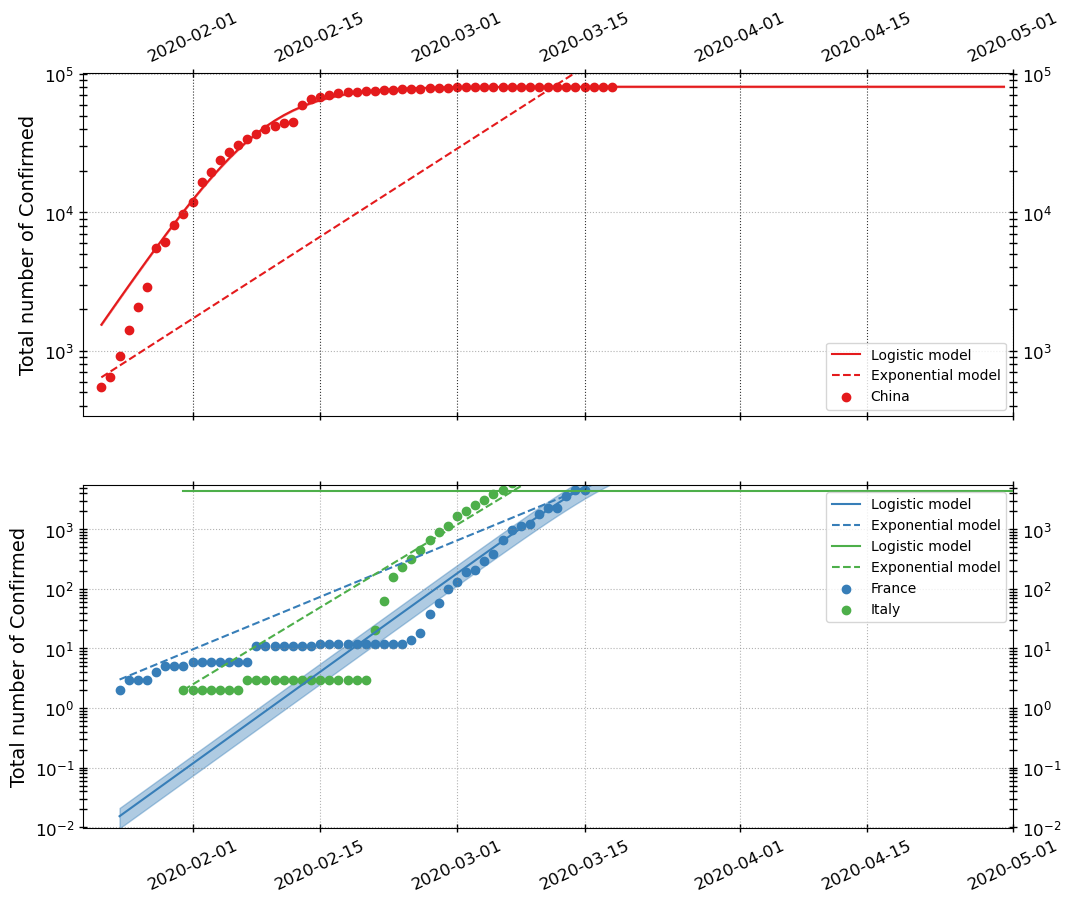

In [66]:

color_list = plt.cm.Set1( np.linspace(0.,1.0, 9 ) )
color_iter = iter(color_list)

fig=plt.figure(1, figsize=(12,10), dpi=100,facecolor='w')

#simulation_box_size = 3000   #the larger the size, the smaller sampling errors at large scales

axes = fig.subplots(2, sharex=True, sharey=False)

flatasymp = max([c_pars[(country,chosen_plotmodel,'c_time')] for country in countries_list])+3
flatasymp = 100
mindate = min([df_dict[country].index[0] for country in countries_list])
#maxn = c_pars[('US',chosen_plotmodel,'c_time')]  #min([c_pars[(country,chosen_plotmodel,'c_time')] for country in countries_list])
maxdate = mindate + np.timedelta64(flatasymp,'D')


for country in countries_list[[0,1,2]]:

    col=next(color_iter)
    if country in countries_list[[0]]: ##choose here which countries go where
        ax = axes[0]
        
    elif country in countries_list[[1]]:
        ax = axes[1]
        #col=next(color_iter)
        #col=next(color_iter)

    x = np.array(list(df_dict[country]['DayCount'].values))
    y = np.array(list(df_dict[country]['Cases'].values))

    
    pred_x = np.arange(np.min(x),flatasymp+np.min(x))

    pred_date = pd.date_range(start=df_dict[country].index[0], periods=flatasymp).values#  np.arange(np.min(x),66+np.min(x))

    if country=="Korea, South":
        labelcountry='South Korea'
    else:
        labelcountry=country

    ax.scatter(df_dict[country].index ,y , label=labelcountry,color=col)# Predicted logistic curve

    a,b,c = (c_pars[(country,chosen_plotmodel,par)] for par in ['a','b','c'])
    sigma_a,sigma_b,sigma_c = (c_pars[(country,chosen_plotmodel,par)] for par in ['sga','sgb','sgc'])

    mean = [reg_model(i,a,b,c) for i in pred_x]
    ax.semilogy(pred_date, mean , label=chosen_plotmodel+" model", color=col)  #Predicted Logistic Curve
    
    upper_lim = [reg_model(i,a+0,b+0,c+sigma_c) for i in pred_x]

    lower_lim = [reg_model(i,a-0,b-0,c-sigma_c) for i in pred_x]

    ax.fill_between(pred_date, upper_lim, lower_lim, color=col, alpha=0.4)
    
    p,y0 = (c_pars[(country,'Exponential','p')],c_pars[(country,'Exponential','y0')] )
    
    ax.plot(pred_date, [exponential_model(i,p, N0=y0) for i in pred_x], '--',label="Exponential model", color=col)
    
    ax.set_ylabel("Total number of "+str(casestr), fontsize=14)

    axes[1].tick_params(axis='x', direction='inout', length=6, width=1,
                  grid_color='k', grid_alpha=0.8, rotation=25, top=True, labeltop=False, labelsize=12)
    axes[0].tick_params(axis='x', direction='inout', length=6, width=1,
                  grid_color='k', grid_alpha=0.8, rotation=25, top=True, labeltop=True, labelsize=12)
    
    ax.tick_params(axis='y', which='both', direction='inout', length=6, width=1,
                  grid_color='k', grid_alpha=0.8, rotation=0, top=True, labelright=True, labelsize=12)
    ax.yaxis.set_ticks_position('both')
    
    ax.legend(loc='best')

    ax.set_xlim([mindate-np.timedelta64(2,'D'), maxdate])
    
    ax.grid(True,which="major",ls=":",c='gray', alpha=0.6)  
    
    ax0lim = c_pars[(countries_list[0],chosen_plotmodel,'c')]
    #axes[0].set_ylim(-5000, china_c*2)##  
    axes[0].set_ylim(-5000, ax0lim*1.25)##  


    ax1lim = c_pars[(countries_list[2],chosen_plotmodel,'c')]
    #axes[1].set_ylim(-5000, it_c*1.25)
    axes[1].set_ylim(-5000, ax1lim*1.25)
    #fig.show()

# predict 

In [57]:
def frm(flo):
  return '{:d}'.format(int(round(flo)))

if leaveout==None:
      leaveout=0

In [58]:
chosenmodel='Logistic'

if chosenmodel=="Logistic":
    print("Chosen Model: ", chosenmodel)
    reg_model = logistic_model
elif chosenmodel=='Gompertz':
    print("Chosen Model: ", chosenmodel)
    reg_model = gompertz_model

pred_days = 0

for country in countries_list:
  print("\n ***Country: "+str(country))
  x = np.array(list(df_dict[country]['DayCount'].values))
  print("Used data, Day Count: ", x[-1+leaveout])
  print("Used data, Last day date: ", datetime.strftime(df_dict[country].index[-1+leaveout], ' %d, %b %Y' ))
  y = np.array(list(df_dict[country]['Cases'].values))
  print("Used data, Number of cases: "+casestr+" in the last day: ", y[-1+leaveout])
  print("---")

  day = x[-1]+pred_days
  pred_date = datetime.strftime(df_dict[country].index[-1] + timedelta(days=pred_days), ' %d, %b %Y' )
  print("Prediction for: ", pred_date)
  
  realdat = y[-1]


  a,b,c = (c_pars[(country,chosenmodel,par)] for par in ['a','b','c'])
  sigma_a,sigma_b,sigma_c = (c_pars[(country,chosenmodel,par)] for par in ['sga','sgb','sgc'])

  prediction = reg_model(day,a,b,c)
  pluspred = np.abs(reg_model(day,np.abs(a+sigma_a),np.abs(b+sigma_b),np.abs(c+sigma_c)))
  minuspred = np.abs(reg_model(day,np.abs(a-sigma_a),np.abs(b-sigma_b),np.abs(c-sigma_c)))

  print("Prediction from "+chosenmodel+" Model : ", frm(prediction), ' ( +'+frm(pluspred-prediction)+', -'+frm(prediction-minuspred)+')')

  print("Real data: ", frm(realdat))
  prediction_error_perc = 100*(prediction-realdat)/realdat
  print("Prediction Percentage error: ", '{:2f}'.format(prediction_error_perc), '%')





Chosen Model:  Logistic

 ***Country: China
Used data, Day Count:  56
Used data, Last day date:   17, Mar 2020
Used data, Number of cases: Confirmed in the last day:  81058
---
Prediction for:   18, Mar 2020
Prediction from Logistic Model :  80907  ( +477, -479)
Real data:  81102
Prediction Percentage error:  -0.240897 %

 ***Country: France
Used data, Day Count:  54
Used data, Last day date:   17, Mar 2020
Used data, Number of cases: Confirmed in the last day:  7699
---
Prediction for:   18, Mar 2020
Prediction from Logistic Model :  9234  ( +-291, -1131)
Real data:  9105
Prediction Percentage error:  1.416989 %

 ***Country: Italy
Used data, Day Count:  47
Used data, Last day date:   17, Mar 2020
Used data, Number of cases: Confirmed in the last day:  31506
---
Prediction for:   18, Mar 2020


<ipython-input-46-217b90406de8>:5: RuntimeWarning: invalid value encountered in double_scalars
  return c/(1+np.exp(-(x-b)/a))


ValueError: cannot convert float NaN to integer

# plot daily increment

<ipython-input-46-217b90406de8>:5: RuntimeWarning: invalid value encountered in double_scalars
  return c/(1+np.exp(-(x-b)/a))


KeyError: ('Spain', 'Logistic', 'c')

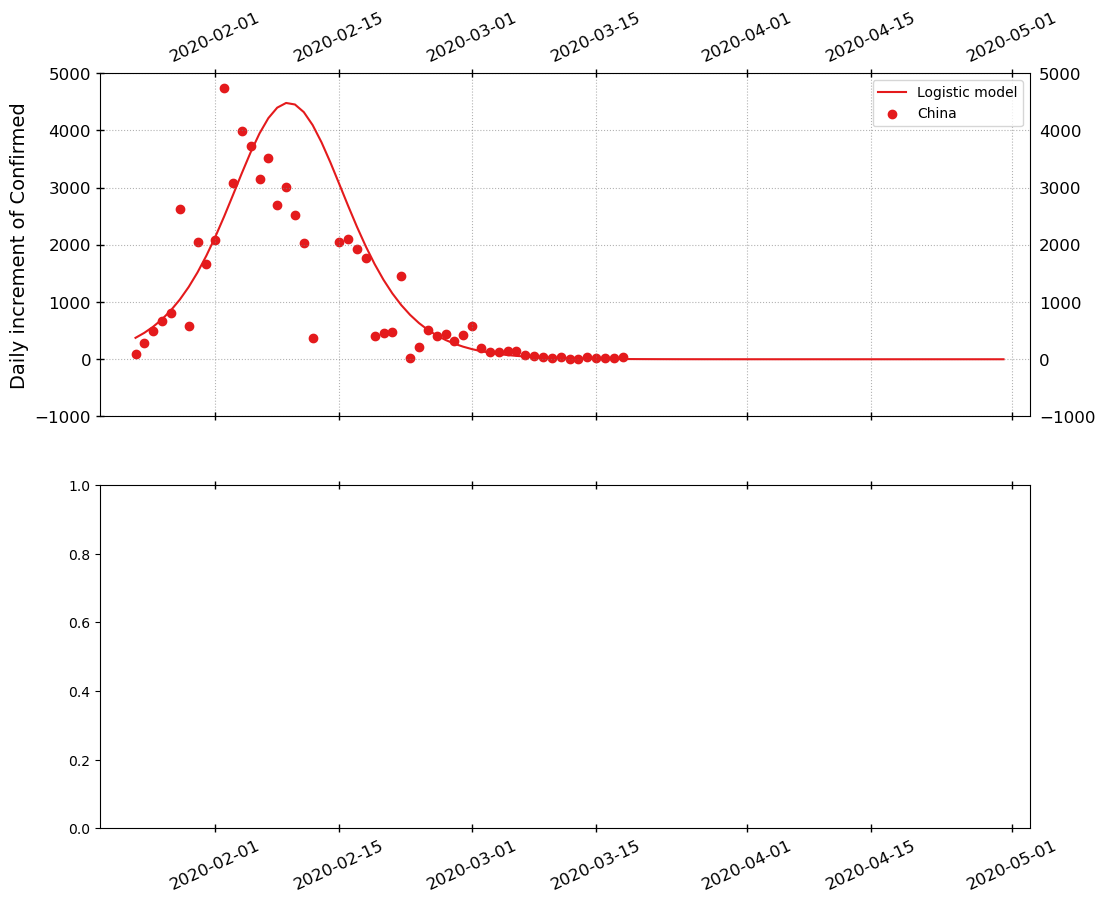

In [67]:
color_list = plt.cm.Set1( np.linspace(0.,1.0, 9 ) )
color_iter = iter(color_list)

fig=plt.figure(1, figsize=(12,10), dpi=100,facecolor='w')

#simulation_box_size = 3000   #the larger the size, the smaller sampling errors at large scales

axes = fig.subplots(2, sharex=True, sharey=False)

flatasymp = max([c_pars[(country,chosen_plotmodel,'c_time')] for country in countries_list])+1
flatasymp = 100
mindate = min([df_dict[country].index[0] for country in countries_list])
maxdate = min([c_pars[(country,chosen_plotmodel,'c_time')] for country in countries_list])

for country in countries_list:

    col=next(color_iter)
    if country in countries_list[[0]]: ##choose here which countries go where
        ax = axes[0]
        
    elif country in countries_list[[1]]:
        ax = axes[1]
        #col=next(color_iter)
        #col=next(color_iter)

    x = np.array(list(df_dict[country]['DayCount'].values))
    y = np.array(list(df_dict[country]['Cases'].values))

    
    pred_x = np.arange(np.min(x),flatasymp+np.min(x))

    pred_date = pd.date_range(start=df_dict[country].index[0], periods=flatasymp).values#  np.arange(np.min(x),66+np.min(x))

    if country=="Korea, South":
        labelcountry='South Korea'
    else:
        labelcountry=country

    ydiff = np.diff(y)
    ax.scatter(df_dict[country].index[1:] ,ydiff , label=labelcountry,color=col)# Predicted logistic curve

    a,b,c = (c_pars[(country,chosen_plotmodel,par)] for par in ['a','b','c'])
    #sigma_a,sigma_b,sigma_c = (c_pars[(country,chosen_plotmodel,par)] for par in ['sga','sgb','sgc'])

    mean = [reg_model(i,a,b,c) for i in pred_x]

    mean_diff = np.diff(mean)

    ax.plot(pred_date[1:], mean_diff , label=chosen_plotmodel+" model", color=col)  #Predicted Logistic Curve
    
    upper_lim = [reg_model(i,a+sigma_a,b+sigma_b,c+sigma_c) for i in pred_x]

    lower_lim = [reg_model(i,a-sigma_a,b-sigma_b,c-sigma_c) for i in pred_x]

    upper_lim_diff = np.diff(upper_lim)
    lower_lim_diff = np.diff(lower_lim)

    ax.fill_between(pred_date[1:], upper_lim_diff, lower_lim_diff, color=col, alpha=0.4)
    
    #p,y0 = (c_pars[(country,'Exponential','p')],c_pars[(country,'Exponential','y0')] )
    
    #meanexp = [expo_model(i,p, N0=y0) for i in pred_x]

    #ax.plot(pred_date, [expo_model(i,p, N0=y0) for i in pred_x], '--',label="Exponential model", color=col)
    
    ax.set_ylabel("Daily increment of "+str(casestr), fontsize=14)

    axes[1].tick_params(axis='x', direction='inout', length=6, width=1,
                  grid_color='k', grid_alpha=0.8, rotation=25, top=True, labeltop=False, labelsize=12)
    axes[0].tick_params(axis='x', direction='inout', length=6, width=1,
                  grid_color='k', grid_alpha=0.8, rotation=25, top=True, labeltop=True, labelsize=12)
    
    ax.tick_params(axis='y', which='both', direction='inout', length=6, width=1,
                  grid_color='k', grid_alpha=0.8, rotation=0, top=True, labelright=True, labelsize=12)
    
    ax.legend(loc='best')

    ax.set_xlim([mindate-np.timedelta64(3,'D'), pred_date[-1]+np.timedelta64(3,'D')])
    
    ax.grid(True,which="major",ls=":",c='gray', alpha=0.6)  
    
    #china_c = c_pars[('China',chosen_plotmodel,'c')]
    #axes[0].set_ylim(-5000, china_c*2)##  
    axes[0].set_ylim(-1000, 5000)##  


    it_c = c_pars[('Spain',chosen_plotmodel,'c')]
    #axes[1].set_ylim(-5000, it_c*1.25)
    axes[1].set_ylim(-1000, 5000)
    #fig.show()